<a href="https://colab.research.google.com/github/topdeveloppement/ai-nexus-one-machine-learning/blob/main/regression_lineaire_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Introduction à la Régression Linéaire Simple

<img src="https://github.com/topdeveloppement.png" alt="Photo de l'auteur" width="100" style="border-radius: 10px;"/>

<details>
<summary style="font-family: 'Brush Script MT', cursive; font-size: 1.5em;">ℹ️ À propos de AI Nexus One</summary>

**Auteur :** Omar Kennouche, fondateur de **AI Nexus One**  
**AI Nexus One** est un projet dédié à la formation et au développement de solutions en intelligence artificielle, visant à accompagner les entreprises dans l'exploitation des technologies avancées pour **optimiser leurs opérations** et **innover**.

AI Nexus One propose une gamme complète de **modules de formation** sur des sujets comme le Machine Learning, la vision par ordinateur, et l’automatisation (RPA). Il développe aussi des solutions **sur mesure** et offre un accompagnement pour faciliter l'**intégration pratique de l'IA** dans des domaines tels que les ressources humaines, la gestion des données et la relation client.

En somme, **AI Nexus One** se veut un partenaire pour les entreprises cherchant à se démarquer dans un monde en évolution rapide, tout en conservant une approche **humaine** et **intuitive** des technologies.
</details>



<div style="text-align: center;">
    <img src="https://github.com/topdeveloppement/ai-nexus-one-machine-learning/blob/main/ml.jpeg?raw=true" alt="Régression Linéaire" style="width: 100%; height: auto;">
</div>


La **régression linéaire simple** est une méthode statistique permettant de modéliser la relation entre une variable indépendante (explicative) et une variable dépendante (à prédire) en ajustant une droite aux données observées.

## Définition et Objectifs

- **Objectif principal** : Prédire la valeur de la variable dépendante en fonction de la variable indépendante.
- **Modélisation** : Trouver la meilleure droite qui représente la relation entre les deux variables.

## Cas d'Utilisation et Exemples Concrets

- Prédire le **rendement d'une culture** en fonction de la quantité de fertilisant utilisée.
- Estimer la **production de céréales** d'une coopérative en fonction du nombre d'adhérents.
- Anticiper la **demande de marché** en fonction des tendances précédentes.

## Hypothèses de Base

1. **Linéarité** : Il existe une relation linéaire entre la variable indépendante et la variable dépendante.
2. **Indépendance des erreurs** : Les résidus (erreurs) sont indépendants les uns des autres.
3. **Homoscedasticité** : La variance des erreurs est constante pour toutes les valeurs de la variable indépendante.
4. **Normalité des erreurs** : Les erreurs sont distribuées normalement.

---

# Préparation de l'Environnement

Dans cette section, nous allons :

- Importer les bibliothèques nécessaires.
- Charger les données d'exemple.

---

In [1]:
# Importation des bibliothèques nécessaires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Paramètres d'affichage
%matplotlib inline
sns.set_style('whitegrid')

print("Les bibliothèques ont été importées avec succès.")

Les bibliothèques ont été importées avec succès.


## Chargement des Données d'Exemple

Pour cet exemple, nous allons créer un jeu de données synthétique simulant le rendement en céréales en fonction de la quantité de fertilisant utilisée.

---

In [2]:
# Création d'un dataset synthétique
np.random.seed(42)
n_samples = 100
fertilizer = np.random.uniform(0, 100, n_samples)  # Quantité de fertilisant en kg/ha
yield_cereals = 2 + 0.5 * fertilizer + np.random.normal(0, 5, n_samples)  # Rendement en tonnes/ha

# Conversion en DataFrame pandas
data = pd.DataFrame({'Fertilizer': fertilizer, 'Yield': yield_cereals})

# Affichage des 5 premières lignes
data.head()

,Fertilizer,Yield
0,37.454012,21.162241
1,95.071431,48.040679
2,73.199394,39.058501
3,59.865848,21.995080
4,15.601864,8.702573


# Exploration et Visualisation des Données

Dans cette section, nous allons :

- Afficher les premières lignes du dataset.
- Obtenir des statistiques descriptives.
- Visualiser la distribution des variables.
- Créer un nuage de points (scatter plot).

---

In [3]:
# Affichage des premières lignes
data.head()

,Fertilizer,Yield
0,37.454012,21.162241
1,95.071431,48.040679
2,73.199394,39.058501
3,59.865848,21.995080
4,15.601864,8.702573


In [4]:
# Statistiques descriptives
data.describe()

,Fertilizer,Yield
count,100.000000,100.000000
mean,47.018074,25.503635
std,29.748941,14.890968
min,0.552212,-0.335757
25%,19.320076,12.514701
50%,46.414245,23.155532
75%,73.020312,38.649577
max,98.688694,55.253461


**Interprétation** : Les statistiques descriptives nous donnent des informations sur la moyenne, l'écart-type, les valeurs minimales et maximales, et les quartiles des variables 'Fertilizer' et 'Yield'. Cela nous aide à comprendre la distribution et la dispersion des données.

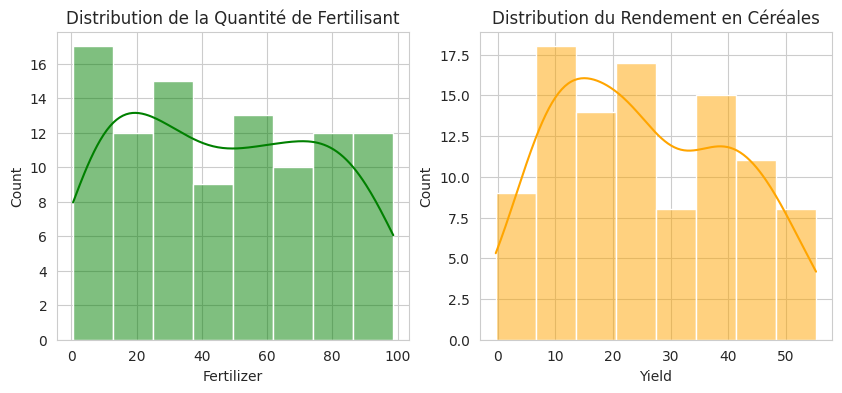

In [5]:
# Visualisation de la distribution des variables

# Histogramme de Fertilizer
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data['Fertilizer'], kde=True, color='green')
plt.title('Distribution de la Quantité de Fertilisant')

# Histogramme de Yield
plt.subplot(1,2,2)
sns.histplot(data['Yield'], kde=True, color='orange')
plt.title('Distribution du Rendement en Céréales')

plt.show()

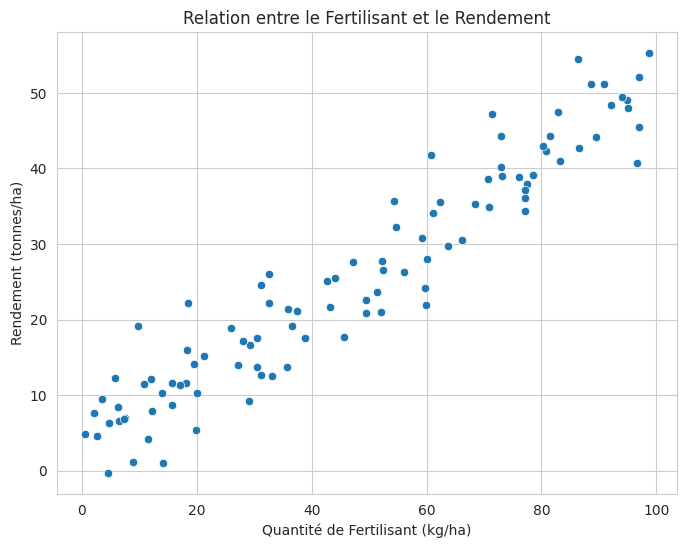

In [6]:
# Création d'un nuage de points
plt.figure(figsize=(8,6))
sns.scatterplot(x='Fertilizer', y='Yield', data=data)
plt.title('Relation entre le Fertilisant et le Rendement')
plt.xlabel('Quantité de Fertilisant (kg/ha)')
plt.ylabel('Rendement (tonnes/ha)')
plt.show()

# Prétraitement des Données

Nous allons :

- Vérifier les valeurs manquantes.
- Détecter et traiter les valeurs aberrantes.
- Séparer les données en ensembles d'entraînement et de test.

---

In [7]:
# Vérification des valeurs manquantes
data.isnull().sum()

,0
Fertilizer,0
Yield,0


## Détection et Traitement des Valeurs Aberrantes

Nous utilisons des boîtes à moustaches pour détecter les outliers.

---

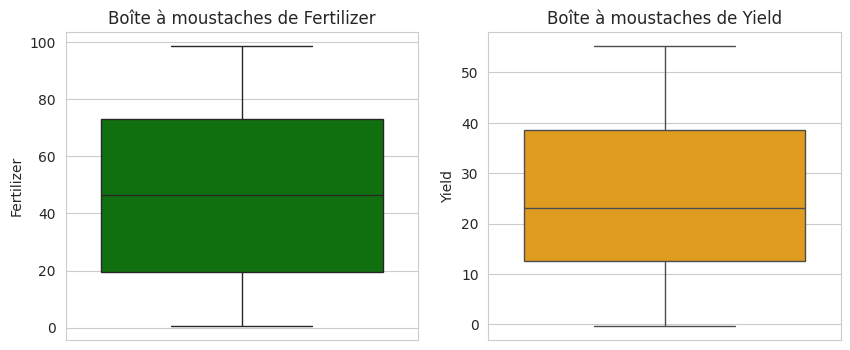

In [8]:
# Boîte à moustaches pour détecter les outliers
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(y='Fertilizer', data=data, color='green')
plt.title('Boîte à moustaches de Fertilizer')

plt.subplot(1,2,2)
sns.boxplot(y='Yield', data=data, color='orange')
plt.title('Boîte à moustaches de Yield')

plt.show()

## Séparation des Données en Ensembles d'Entraînement et de Test

Nous séparons les données pour évaluer le modèle sur des données non vues.

---

In [9]:
# Séparation des variables indépendantes et dépendantes
X = data[['Fertilizer']]
y = data['Yield']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implémentation de la Régression Linéaire Simple

Nous allons :

- Calculer manuellement les coefficients.
- Utiliser la classe `LinearRegression` de scikit-learn.

---

## Calcul Manuel des Coefficients

Nous utilisons la formule des moindres carrés ordinaires (OLS) pour calculer les coefficients.

$$
 \beta = (X^T X)^{-1} X^T y
$$

---

In [10]:
# Ajout d'une colonne de biais (interception)
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Calcul des coefficients
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

print(f"Ordonnée à l'origine (interception): {theta_best[0]:.2f}")
print(f"Pente: {theta_best[1]:.2f}")

Ordonnée à l'origine (interception): 2.71
Pente: 0.48


## Utilisation de la Classe `LinearRegression`

Nous utilisons scikit-learn pour entraîner le modèle.

---

In [11]:
# Création du modèle
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Coefficients du modèle
print(f"Ordonnée à l'origine (interception): {model.intercept_:.2f}")
print(f"Pente: {model.coef_[0]:.2f}")

Ordonnée à l'origine (interception): 2.71
Pente: 0.48


# Évaluation du Modèle

Nous allons :

- Calculer les métriques de performance.
- Interpréter les résultats.

---

In [12]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Coefficient de Détermination (R²): {r2:.2f}")

Mean Squared Error (MSE): 16.34
Root Mean Squared Error (RMSE): 4.04
Mean Absolute Error (MAE): 2.96
Coefficient de Détermination (R²): 0.93


## Interprétation des Résultats

- **MSE** : Plus la valeur est faible, mieux c'est. Elle mesure la moyenne des erreurs au carré.
- **RMSE** : Donne une idée de l'erreur moyenne en unités de la variable dépendante.
- **MAE** : Indique l'erreur moyenne absolue entre les prédictions et les valeurs réelles.
- **R²** : Plus il est proche de 1, mieux le modèle explique la variance des données.

---

# Visualisation des Résultats

Nous allons :

- Tracer la droite de régression.
- Visualiser les résidus.

---

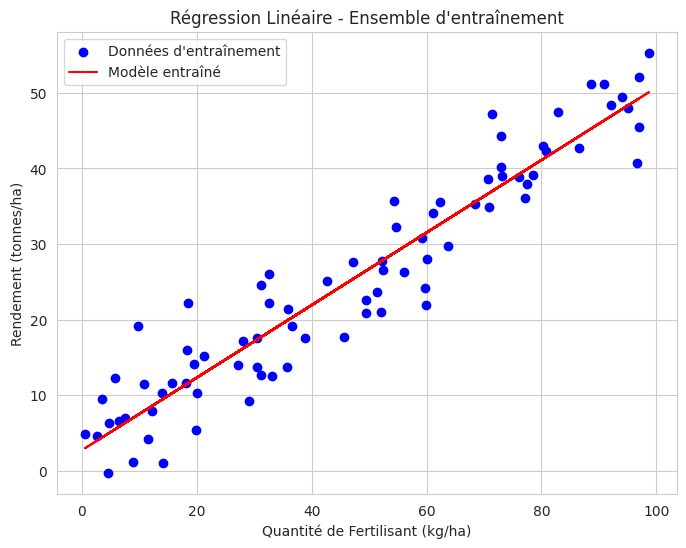

In [13]:
# Tracé de la droite de régression sur le nuage de points
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', label='Données d\'entraînement')
plt.plot(X_train, model.predict(X_train), color='red', label='Modèle entraîné')
plt.title('Régression Linéaire - Ensemble d\'entraînement')
plt.xlabel('Quantité de Fertilisant (kg/ha)')
plt.ylabel('Rendement (tonnes/ha)')
plt.legend()
plt.show()

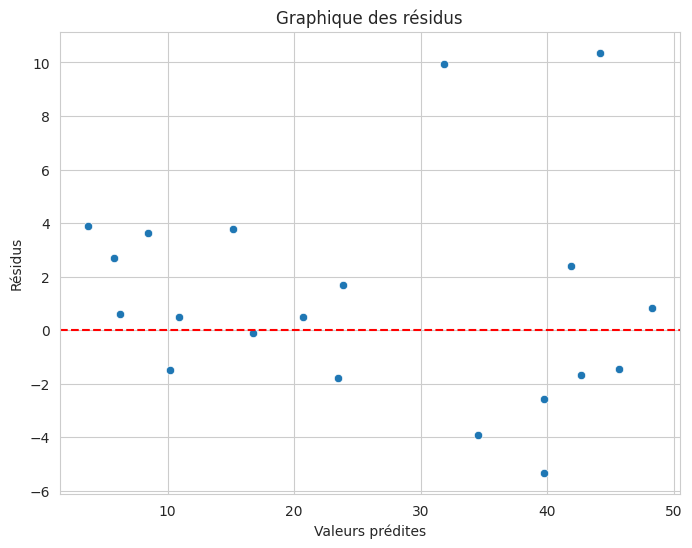

In [14]:
# Visualisation des résidus
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Graphique des résidus')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.show()

**Interprétation** : Le graphique des résidus nous permet de vérifier l'hypothèse d'homoscedasticité et de détecter d'éventuels motifs indiquant une mauvaise adéquation du modèle.

# Prédictions avec le Modèle

Nous allons :

- Utiliser le modèle pour faire des prédictions sur de nouvelles données.
- Interpréter les prédictions.

---

In [17]:
# Nouvelles données (quantités de fertilisant) sous forme de DataFrame pandas
X_new = pd.DataFrame({'Fertilizer': [10, 50, 90]})

# Prédictions
y_new = model.predict(X_new)

# Affichage des prédictions
for i, x in enumerate(X_new['Fertilizer']):
    print(f"Pour une quantité de fertilisant de {x} kg/ha, le rendement prédit est de {y_new[i]:.2f} tonnes/ha")

Pour une quantité de fertilisant de 12 kg/ha, le rendement prédit est de 8.47 tonnes/ha
Pour une quantité de fertilisant de 50 kg/ha, le rendement prédit est de 26.71 tonnes/ha
Pour une quantité de fertilisant de 90 kg/ha, le rendement prédit est de 45.91 tonnes/ha


## Interprétation des Prédictions

Le modèle nous permet d'estimer le rendement en fonction de la quantité de fertilisant appliquée. Ces prédictions peuvent aider les agriculteurs à optimiser l'utilisation des ressources pour maximiser le rendement.

---

# Diagnostic du Modèle

Nous allons :

- Vérifier les hypothèses de la régression linéaire.
- Analyser les résidus.

---

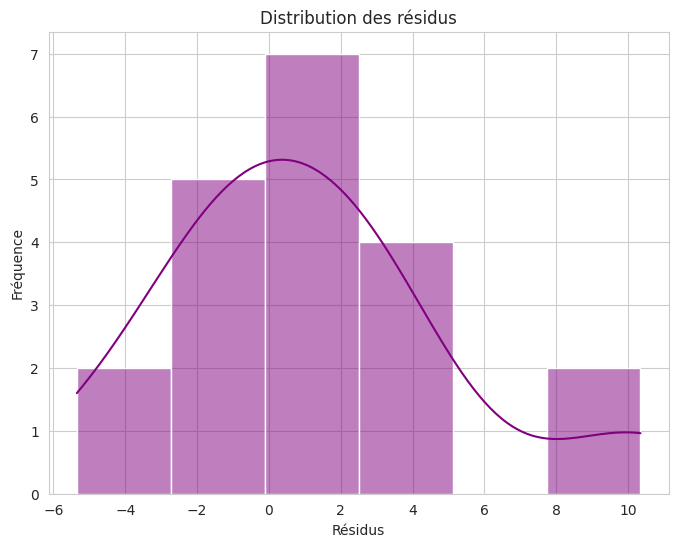

In [16]:
# Vérification de la normalité des résidus
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

## Analyse des Résidus

Si les résidus suivent une distribution normale centrée autour de zéro, cela suggère que les hypothèses du modèle sont satisfaites.

---

# Amélioration du Modèle

## Techniques pour Améliorer les Performances

- **Transformation des variables** : Appliquer des transformations (logarithme, racine carrée) pour linéariser les relations non linéaires.
- **Ajout de variables explicatives** : Inclure d'autres facteurs influençant le rendement (type de sol, précipitations, etc.).
- **Détection des outliers** : Identifier et traiter les valeurs aberrantes qui peuvent influencer le modèle.

## Limites de la Régression Linéaire Simple

- **Simplicité du modèle** : Ne capture pas les relations complexes entre les variables.
- **Sensibilité aux outliers** : Les valeurs aberrantes peuvent avoir un impact significatif sur le modèle.
- **Suppositions strictes** : Le modèle repose sur des hypothèses qui peuvent ne pas être satisfaites dans la réalité.

---

# Conclusion et Récapitulatif

Nous avons :

- **Exploré** le concept de régression linéaire simple et ses applications dans le contexte agricole.
- **Créé** un dataset synthétique pour simuler la relation entre le fertilisant et le rendement.
- **Implémenté** le modèle de régression linéaire simple manuellement et avec scikit-learn.
- **Évalué** le modèle en utilisant diverses métriques et en analysant les résidus.
- **Discuté** des moyens d'améliorer le modèle et des limites de la régression linéaire simple.

**Auteur :** Omar Kennouche, fondateur de **AI Nexus One**

*Merci d'avoir suivi ce notebook ! N'hésitez pas à explorer davantage et à appliquer ces techniques à vos propres données.*

---

# Exercices Pratiques

1. **Modifier le Dataset** : Changez les paramètres de la génération des données (par exemple, la relation entre le fertilisant et le rendement) et observez l'impact sur le modèle.
2. **Ajouter une Variable** : Incluez une nouvelle variable explicative (par exemple, le type de sol) et passez à une régression linéaire multiple.
3. **Tester un Dataset Réel** : Utilisez un jeu de données réel lié à l'agriculture et appliquez les mêmes étapes.

---

# Lexique des Termes Techniques

- **Régression linéaire** : Méthode statistique pour modéliser la relation entre une variable dépendante et une ou plusieurs variables indépendantes.
- **Variable indépendante** : Variable utilisée pour prédire la variable dépendante (ex : quantité de fertilisant).
- **Variable dépendante** : Variable cible que l'on cherche à prédire (ex : rendement en céréales).
- **Pente (Coefficient)** : Indique l'effet moyen d'une unité de changement de la variable indépendante sur la variable dépendante.
- **Ordonnée à l'origine (Intercept)** : Valeur de la variable dépendante lorsque la variable indépendante est nulle.
- **Résidu** : Différence entre la valeur observée et la valeur prédite par le modèle.
- **MSE** : Mean Squared Error, moyenne des erreurs quadratiques.
- **RMSE** : Root Mean Squared Error, racine carrée du MSE.
- **MAE** : Mean Absolute Error, moyenne des erreurs absolues.
- **R²** : Coefficient de détermination, mesure la proportion de la variance expliquée par le modèle.

---

# Ressources Supplémentaires

- [Documentation Scikit-Learn - Régression Linéaire](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)
- [Cours sur la Régression Linéaire - OpenClassrooms](https://openclassrooms.com/fr/courses/4525286-realisez-des-analyses-statistiques-avec-python)
- [Introduction à la Régression Linéaire - StatQuest (Vidéo)](https://www.youtube.com/watch?v=nk2CQITm_eo)
- [Livre : "An Introduction to Statistical Learning" - Chapitre sur la Régression Linéaire](https://www.statlearning.com/)

---